In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bearing-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F657721%2F1161622%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240413%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240413T141233Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2d5325c5ce1bb2cf18ad5a6240858673cd3e6b810cf4fd869e1c3a00d0654ae59969125e71705338967d116705b1b829881699e7db30f4dddbc0a9846575e3fb8677ba863313fcd6a484f446b218ca61c7df976e25890367780ee2f568247d411700797558d7fe2e9901adc57069971908d7484a180833524cba9df21caca5f335e5a732c32cf146e0f8fcaa161a809d4bc8535f90a6b2c960bccf748f30156c649efb78c640196ff86e9a32223ae9b4e38d44277391a0b8aed71fd8b66ecdf3e6aa740c74c1ed11db21f1f21af3e18ad627a366c2563bf0be72fcd8e2e0b2e640d2a301ab8b280f045f050fb96dc02bef1de2e4e6d8955c1beb578f2cec079a'

KAGGLE_INPUT_PATH='content/kaggle/input'
KAGGLE_WORKING_PATH='content/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount content/kaggle/input/ 2> /dev/null
shutil.rmtree('content/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1671101276 bytes downloaded
Downloaded and uncompressed: bearing-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow

from numpy.random import seed
from keras.layers import Input, Dropout

from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

import warnings
warnings.filterwarnings(action='ignore')

# Input data files are available in the read-only "../input/" directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import pandas as pd
import numpy as np

data_dir = 'content/kaggle/input/bearing-dataset/2nd_test/2nd_test'
data_frames = []  # List to store individual DataFrames

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

# Concatenate the list of DataFrames into a single DataFrame
merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']


In [ ]:
import os
import pandas as pd
import numpy as np

data_dir = 'content/kaggle/input/bearing-dataset/2nd_test/2nd_test'
data_frames = []  # List to store individual DataFrames

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    data_frames.append(dataset_mean_abs)

# Concatenate the list of DataFrames into a single DataFrame
merged_data = pd.concat(data_frames)

merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']


In [ ]:
# transform index to datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.to_csv('merged_Dataset_BearingTest_2.csv')
merged_data.head()

In [ ]:
# transform index to datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')

merged_data = merged_data.sort_index()
merged_data.to_csv('merged_Dataset_BearingTest_2.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


<Axes: >

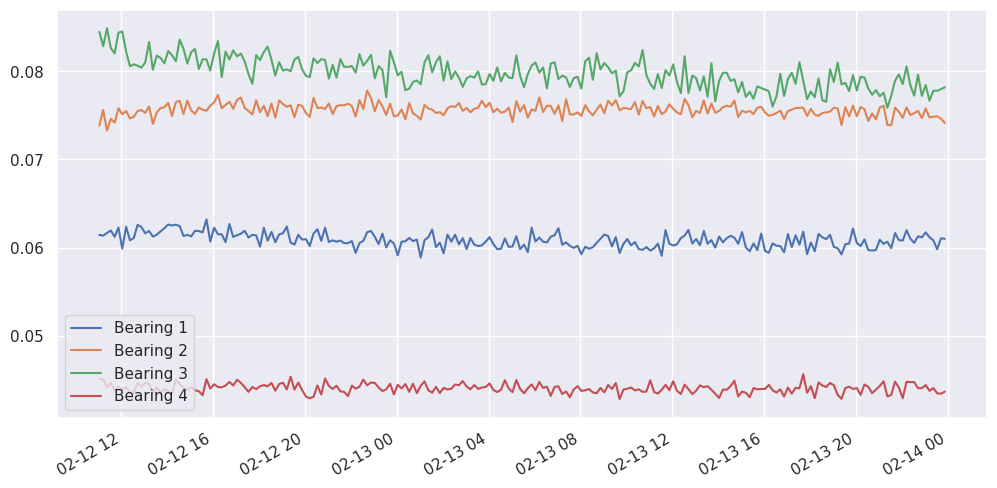

In [ ]:
# define train/test data
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]

dataset_train.plot(figsize = (12, 6))

In [ ]:
# Normalize data

scaler = preprocessing.MinMaxScaler()   # re-scale the data to be in the range [0, 1]

X_train = pd.DataFrame(scaler.fit_transform(dataset_train),
                       columns=dataset_train.columns,
                       index=dataset_train.index)

# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.fit_transform(dataset_test),
                       columns=dataset_test.columns,
                       index=dataset_test.index)

In [ ]:
# sensor readings을 2개 main principal components로 압축

from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [ ]:
# Mahalanobis distance metric: distance가 특정 입계값을 초과하는 경우 "anomaly"로 분류

def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")


def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

    return md

def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [ ]:
# Set up PCA model
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [ ]:
# calculate the covariance matrix and its inverse
covariance_matrix, inv_cov_matrix = cov_matrix(data_train)

# calculate the mean value for the input variables in the train set
# 나중에 test set내 datapoint들의 Mahalanobis distance계산에 사용 됨
mean_distr = data_train.mean(axis=0)

In [ ]:
# calculate Mahalanobis distance for train set
#    -> defining "normal conditions"
#    -> find the threshold value to flag datapoints as an anomaly
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme=True)

In [ ]:
print("Calculated threshold:", threshold)

Calculated threshold: 3.8120454918056534


In [ ]:
print("Calculated threshold:", threshold)

Calculated threshold: 3.8120454918056534


(0.0, 15.0)

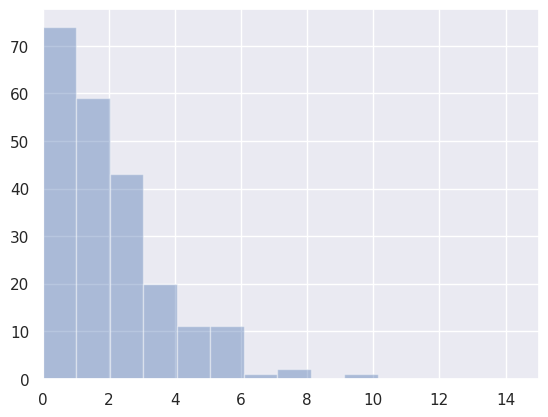

In [ ]:
# m-distance 분포를 시각화하여 flag anomaly에 대한 좋은 임계갑승ㄹ 설정해야 한다.

# m-distance의 제곱(square)을 시각화 (χ2 distribution)
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10,
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

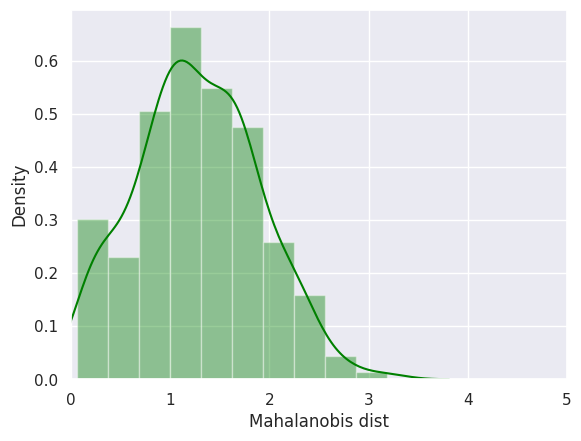

In [ ]:
# m-distance 시각화
plt.figure()
sns.distplot(dist_train,
             bins = 10,
             kde= True,
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [ ]:
# Expected: 이 그래프에서 mahalanobis distance의 최대값은 약3.8로 나타남 => 앞서 계산한 임계값 3.8이 타당하다!
# Mine: 3.8120454918056526 is maybe too high ??
import math
threshold = math.floor(threshold)
threshold

3

In [ ]:
# save m-distance, threshold, anomaly flag to dataframe

# train
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist'] = dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

# test
anomaly = pd.DataFrame()
anomaly['Mob dist'] = dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,0.895470,3,False
2004-02-14 00:02:39,0.884575,3,False
2004-02-14 00:12:39,0.898058,3,False
2004-02-14 00:22:39,0.863729,3,False
2004-02-14 00:32:39,0.873659,3,False


In [ ]:
anomaly[anomaly['Mob dist'] > 3]

,Mob dist,Thresh,Anomaly
2004-02-19 04:22:39,3.072163,3,True
2004-02-19 05:02:39,3.321952,3,True
2004-02-19 05:12:39,3.011165,3,True
2004-02-19 05:22:39,3.122537,3,True
2004-02-19 05:42:39,3.994028,3,True
2004-02-19 06:02:39,3.214215,3,True
2004-02-19 06:12:39,3.409025,3,True
2004-02-19 06:22:39,3.470308,3,True


In [ ]:
# merge the data in a single dataframe
anomaly_alldata = pd.concat([anomaly_train, anomaly])
# save as a .csv file
anomaly_alldata.to_csv('Anomaly_distance.csv')

<Axes: >

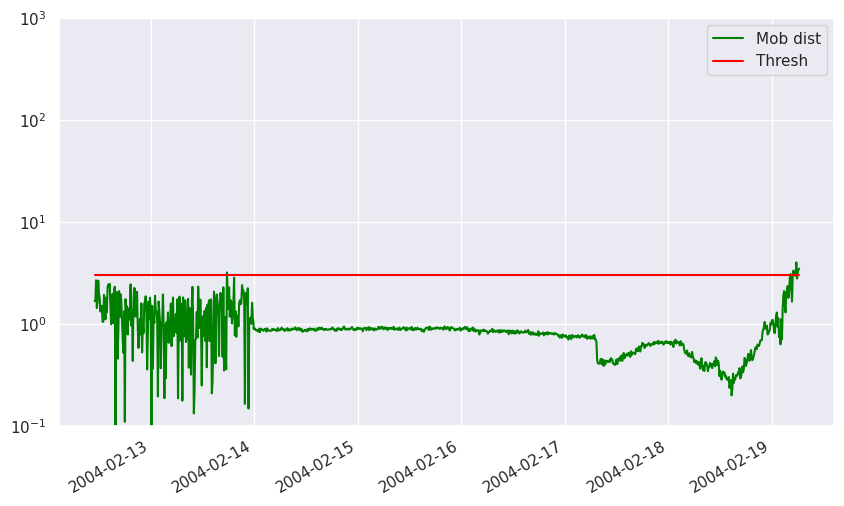

In [ ]:
# plot the calculated anomaly metric(Mob dist)
# check when it crosses the anomaly theshold

anomaly_alldata.plot(logy=True,    # logarithmic y-axis
                    figsize=(10, 6),
                    ylim = [1e-1, 1e3],
                    color = ['green', 'red'])

# Expected Result: 이 그래프에서 모델이 실제 bearing failure보다 약 3days 앞서 anomaly를 감지하는 것을 알 수 있음

In [ ]:
import random
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

random.seed(10)
act_func = 'elu'

# Input layer:
model = Sequential()

# First hidden layer, connected to input vector X.
model.add(Dense(10, activation=act_func,
               kernel_initializer='glorot_uniform',
               kernel_regularizer=regularizers.l2(0.0),
               input_shape=(X_train.shape[1],)
           )
     )

model.add(Dense(2, activation=act_func,
               kernel_initializer='glorot_uniform'))

model.add(Dense(10, activation=act_func,
               kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1], kernel_initializer='glorot_uniform'))

model.compile(loss='mse', optimizer='adam')

# Train model for 100 epochs, batch size of 10:
NUM_EPOCHS = 100
BATCH_SIZE = 10


In [ ]:
# train data의 5%를 각 epoch 이후 validation에 사용

history = model.fit(np.array(X_train), np.array(X_train),
                       batch_size=BATCH_SIZE,
                       epochs=NUM_EPOCHS,
                       validation_split=0.05,
                       verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 0.1291 - val_loss: 0.0429
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0451 - val_loss: 0.0188
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0250 - val_loss: 0.0224
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.0213
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0197
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.0195
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.0189
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0178
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.0182
Epoch 11

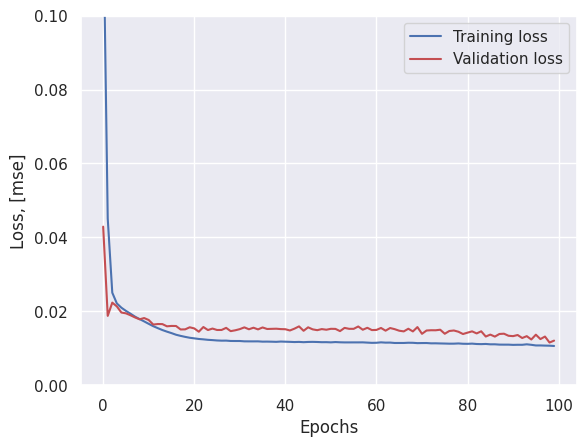

In [ ]:
# Visualize training/validation loss:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

7/7 [==============================] - 0s 5ms/step


(0.0, 0.5)

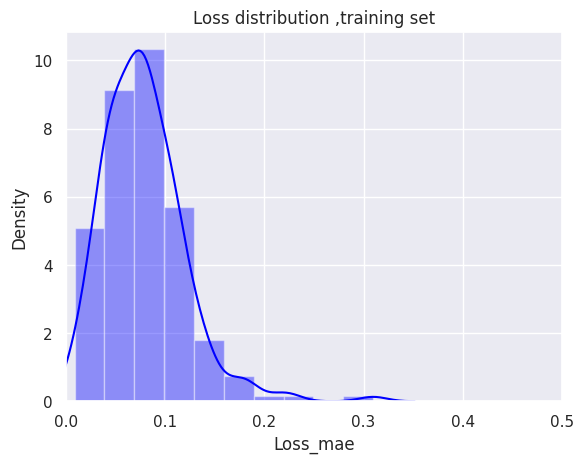

In [ ]:
# Distribution of loss function in the training set
#    -> use this to identify a suitable threshold value for identifying an anomaly

X_pred = model.predict(np.array(X_train))   # X_pred: reconstructed data, X_train: actual data
X_pred = pd.DataFrame(X_pred, columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis=1)

plt.figure()
sns.distplot(scored['Loss_mae'],
            bins=10,
            kde=True,
            color='blue');
plt.title("Loss distribution ,training set")
plt.xlim([0.0, .5])  # set y-axis range